In [14]:
#import liblary
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


In [15]:
# Membuat variabel linguistik untuk input dan output metode mamdanis
suhu = ctrl.Antecedent(np.arange(0, 101, 1), 'suhu')
kelembaban = ctrl.Antecedent(np.arange(0, 101, 1), 'kelembaban')
risiko = ctrl.Consequent(np.arange(0, 101, 1), 'risiko')

# Membuat fungsi keanggotaan untuk variabel suhu
suhu['dingin'] = fuzz.trimf(suhu.universe, [0, 0, 50])
suhu['normal'] = fuzz.trimf(suhu.universe, [0, 50, 100])
suhu['panas'] = fuzz.trimf(suhu.universe, [50, 100, 100])

# Membuat fungsi keanggotaan untuk variabel kelembaban
kelembaban['rendah'] = fuzz.trimf(kelembaban.universe, [0, 0, 50])
kelembaban['normal'] = fuzz.trimf(kelembaban.universe, [0, 50, 100])
kelembaban['tinggi'] = fuzz.trimf(kelembaban.universe, [50, 100, 100])

# Membuat fungsi keanggotaan untuk variabel risiko
risiko['rendah'] = fuzz.trimf(risiko.universe, [0, 0, 50])
risiko['sedang'] = fuzz.trimf(risiko.universe, [0, 50, 100])
risiko['tinggi'] = fuzz.trimf(risiko.universe, [50, 100, 100])

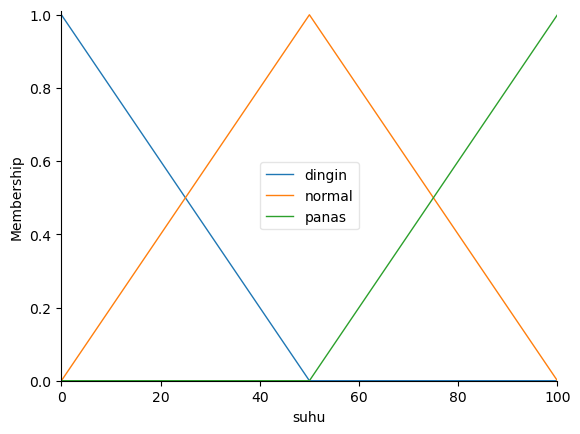

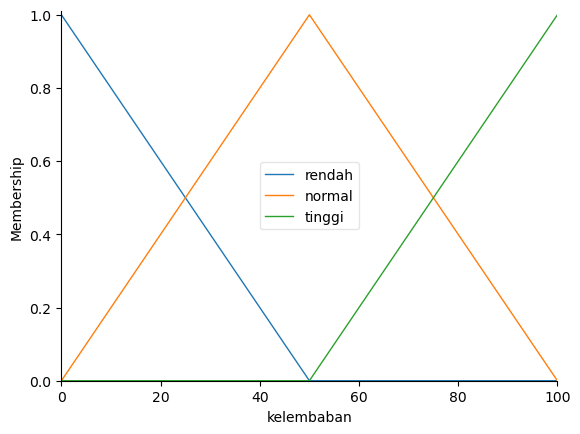

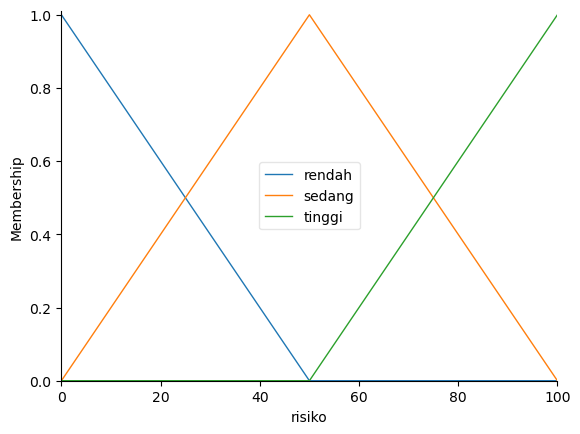

In [16]:
# Menampilkan grafik fungsi keanggotaan
suhu.view()
kelembaban.view()
risiko.view()

In [17]:
# Membuat aturan fuzzy
rule1 = ctrl.Rule(suhu['dingin'] & kelembaban['rendah'], risiko['rendah'])
rule2 = ctrl.Rule(suhu['normal'] & kelembaban['normal'], risiko['sedang'])
rule3 = ctrl.Rule(suhu['panas'] & kelembaban['tinggi'], risiko['tinggi'])

In [18]:
# Membuat sistem kontrol
risiko_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
prediksi_risiko = ctrl.ControlSystemSimulation(risiko_ctrl)

In [19]:
# Input gejala
input_suhu = float(input("Masukkan suhu udara (1-100): "))
input_kelembapan = float(input("Masukkan tingkat kelembapan (1-100): "))

# Set nilai input
prediksi_risiko.input['suhu'] = input_suhu
prediksi_risiko.input['kelembaban'] = input_kelembapan

# # Set nilai input manual
# prediksi_risiko.input['suhu'] = 30
# prediksi_risiko.input['kelembaban'] = 70

Risiko: 49.99999999999996


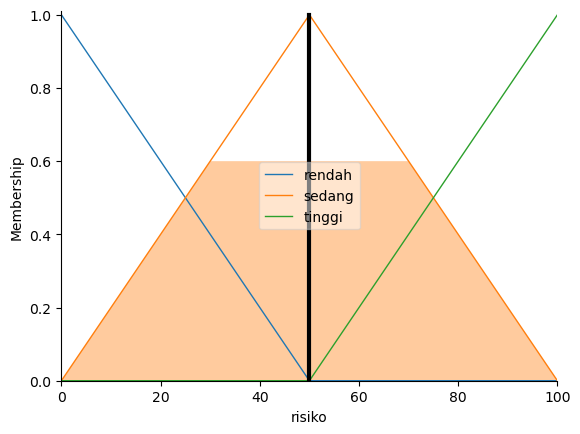

In [20]:
# Melakukan perhitungan
prediksi_risiko.compute()

# Menampilkan output
print("Risiko:", prediksi_risiko.output['risiko'])
risiko.view(sim=prediksi_risiko)